# Analytical Questions

## Q1
Which flight has the highest punctuality rate with the number of flights more than 30?

## Q2
What is the main reason for the cancellation of the flight?

## Q3
Which flight has the highest average arrival delay with the number of flights more than 20?

Reason for choosing these question: The answers for these questions can provide some useful infomation for 
adjusting flight and finding some problems of current flight schedule. 

#### Import needed module

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#### Import data

In [2]:
filename = "https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv"
flights_df = pd.read_csv(filename)

#### Get a new attribute 'Late'
The attribute 'Late' indicates whether the flight is late or not. A flight is late for arriving or departing 15 minutes or more after the scheduled time.

In [4]:
def get_late_info(item):
    # check for arrival delay and departing delay
    if item.loc['ArrDelay'] >= 15 or item.loc['DepDelay'] >=15:
        return 1
    return 0

flights_df['Late'] = flights_df.apply(get_late_info, axis=1)

#### Solve Q1

In [12]:
# get the late count and total number of flights
late_info = flights_df.groupby(by=['FlightNum']).agg({'Late': sum, 'Year': 'count'}).reset_index().rename(columns={'Late': 'LateCount', 'Year': 'Total'})
# get the in-time count
late_info['In-Time'] = late_info['Total'] - late_info['LateCount']
# calculate the In-time rate
late_info['In-Time-Rate'] = late_info['In-Time'] / late_info['Total']
# sorted by In-time rate
sorted_df = late_info.sort_values(by=['In-Time-Rate'], ascending=False)

sorted_df[sorted_df['Total'] > 30].head()

,FlightNum,LateCount,Total,In-Time,In-Time-Rate
538,1471,0,31,31,1.000000
591,1623,0,32,32,1.000000
626,1714,0,31,31,1.000000
175,358,0,31,31,1.000000
423,1048,1,35,34,0.971429


From the above analysis, the flight num 1471, 1623, 1714, 358 have the highest in-time rate.

#### Solve Q2

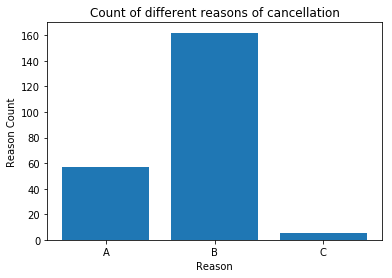

In [17]:
# get the flights with cancelltion
cancellation_df = flights_df[flights_df['Cancelled'] == 1]
# group the dataframe by cancellation code
count_df = cancellation_df.groupby(by=['CancellationCode']).agg({'Year': 'count'}).rename(columns={'Year': 'CodeCount'})
# plot the bar plot
plt.figure()
plt.bar(count_df.index, height=count_df['CodeCount'])
plt.title("Count of different reasons of cancellation")
plt.xlabel("Reason")
plt.ylabel("Reason Count")
plt.show()

As the figure showed above, weather is main cause of cancellation of flight.

#### Solve Q3

In [21]:
# Q3
normal_flight_df = flights_df[flights_df['Cancelled'] == 0]
# count the total delay time
result = normal_flight_df.groupby(by=["FlightNum"]).agg({'ArrDelay': sum, 'Year': 'count'}).reset_index().rename(columns={'ArrDelay': 'TotalDelayTime', 'Year': 'Count'})
# get the average
result['Average'] = result['TotalDelayTime'] / result['Count']
# sort the average
result = result.sort_values(by=['Average'], ascending=False)

result[result['Count'] > 20].head()

,FlightNum,TotalDelayTime,Count,Average
1219,5003,1254.0,26,48.230769
53,59,1572.0,35,44.914286
1205,3786,954.0,31,30.774194
304,670,697.0,24,29.041667
596,1632,778.0,27,28.814815


From the table above, the flight num 5003 has the highest average delay time.